In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import os

path = "/content/drive/MyDrive/Dataset_Mango"

os.chdir(path)
os.getcwd

<function posix.getcwd()>

In [ ]:
#import Library
import numpy as np
import cv2
import matplotlib.pyplot as plt
import pywt.data
from google.colab.patches import cv2_imshow

In [ ]:
#Read Gambar

train_dir = os.path.join(path, 'train')
test_dir = os.path.join(path, 'validation')

train_fresh_dir = os.path.join(train_dir, 'Matang')

train_raw_dir = os.path.join(train_dir, 'Mentah')

test_fresh_dir = os.path.join(test_dir, 'Matang')

test_raw_dir = os.path.join(test_dir, 'Mentah')

In [ ]:
train_fresh_fnames = os.listdir(train_fresh_dir)
print(train_fresh_fnames[:10])

train_raw_fnames = os.listdir(train_raw_dir)
train_raw_fnames.sort()
print(train_raw_fnames[:10])

['Mango_05_A.JPG', 'Mango_02_A.JPG', 'Mango_09_B.JPG', 'Mango_17_B.JPG', 'Mango_19_A.JPG', 'Mango_12_A.JPG', 'Mango_06_B.JPG', 'Mango_10_A.JPG', 'Mango_05_B.JPG', 'Mango_13_B.JPG']
['Mango_25_B.JPG', 'Mango_26_A.JPG', 'Mango_26_B.JPG', 'Mango_27_A.JPG', 'Mango_27_B.JPG', 'Mango_28_A.JPG', 'Mango_28_B.JPG', 'Mango_29_A.JPG', 'Mango_29_B.JPG', 'Mango_30_A.JPG']


In [ ]:
print('total training fresh mango images :', len(os.listdir(train_fresh_dir)))
print('total training raw mango images :', len(os.listdir(train_raw_dir)))
print('total testing fresh mango images :', len(os.listdir(test_fresh_dir)))
print('total testing raw mango images :', len(os.listdir(test_raw_dir)))

total training fresh mango images : 32
total training raw mango images : 32
total testing fresh mango images : 8
total testing raw mango images : 8


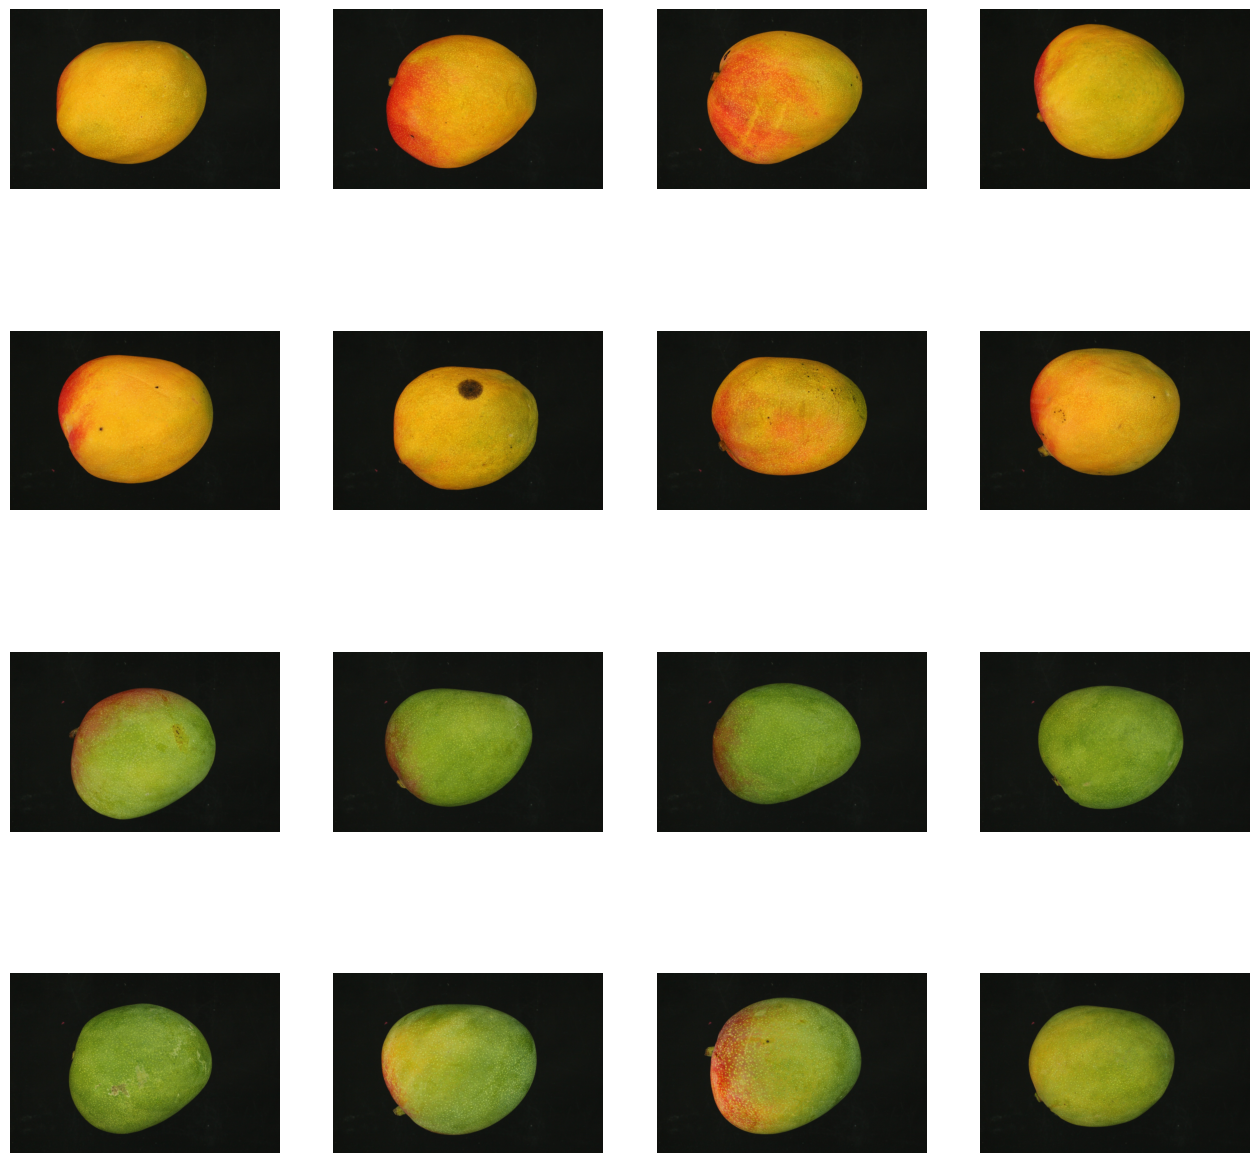

In [ ]:
%matplotlib inline

import matplotlib.pyplot as plt
import matplotlib.image as mpimg

nrows = 4
ncols = 4

pic_index = 0

fig = plt.gcf()
fig.set_size_inches(ncols * 4, nrows * 4)

pic_index += 8
next_mango_pix = [os.path.join(train_fresh_dir, fname)
                  for fname in train_fresh_fnames[pic_index-8:pic_index]]
next_mango_raw_pix = [os.path.join(train_raw_dir, fname)
                      for fname in train_raw_fnames[pic_index-8:pic_index]]

for i, img_path in enumerate(next_mango_pix+next_mango_raw_pix):
  sp = plt.subplot(nrows, ncols, i + 1)
  sp.axis('Off')

  img = mpimg.imread(img_path)
  plt.imshow(img)

plt.show()

In [ ]:
from tensorflow.keras import layers
from tensorflow.keras import Model

img_input = layers.Input(shape=(150, 150, 3))

x = layers.Conv2D(16, 3, activation='relu')(img_input)
x = layers.MaxPooling2D(2)(x)

x = layers.Conv2D(32, 3, activation='relu')(x)
x = layers.MaxPooling2D(2)(x)

x = layers.Conv2D(64, 3, activation='relu')(x)
x = layers.MaxPooling2D(2)(x)

x = layers.Flatten()(x)
x = layers.Dense(512, activation='relu')(x)
output = layers.Dense(1, activation='sigmoid')(x)

model = Model(img_input, output)

model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 150, 150, 3)]     0         
                                                                 
 conv2d_3 (Conv2D)           (None, 148, 148, 16)      448       
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 74, 74, 16)        0         
 g2D)                                                            
                                                                 
 conv2d_4 (Conv2D)           (None, 72, 72, 32)        4640      
                                                                 
 max_pooling2d_3 (MaxPoolin  (None, 36, 36, 32)        0         
 g2D)                                                            
                                                                 
 conv2d_5 (Conv2D)           (None, 34, 34, 64)        18496 

In [ ]:
from tensorflow.keras.optimizers import RMSprop

model.compile(loss='binary_crossentropy',
              optimizer=RMSprop(lr=0.001),
              metrics=['acc'])

In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale=1./255)
val_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(150, 150),
    batch_size=16,
    class_mode='binary'
)

validation_generator = val_datagen.flow_from_directory(
    test_dir,
    target_size=(150, 150),
    batch_size=16,
    class_mode='binary'
)

Found 64 images belonging to 2 classes.
Found 16 images belonging to 2 classes.


In [ ]:
history = model.fit_generator(
    train_generator,
    steps_per_epoch=4,
    epochs=15,
    validation_data=validation_generator,
    validation_steps=1,
    verbose=2
)

Epoch 1/15


<ipython-input-35-f080cc3091eb>:1: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  history = model.fit_generator(


4/4 - 1s - loss: 3.8174e-04 - acc: 1.0000 - val_loss: 0.0016 - val_acc: 1.0000 - 1s/epoch - 366ms/step
Epoch 2/15
4/4 - 2s - loss: 3.2921e-04 - acc: 1.0000 - val_loss: 0.0014 - val_acc: 1.0000 - 2s/epoch - 418ms/step
Epoch 3/15
4/4 - 2s - loss: 2.8507e-04 - acc: 1.0000 - val_loss: 0.0012 - val_acc: 1.0000 - 2s/epoch - 499ms/step
Epoch 4/15
4/4 - 1s - loss: 2.4484e-04 - acc: 1.0000 - val_loss: 0.0011 - val_acc: 1.0000 - 1s/epoch - 331ms/step
Epoch 5/15
4/4 - 1s - loss: 2.1303e-04 - acc: 1.0000 - val_loss: 9.9485e-04 - val_acc: 1.0000 - 1s/epoch - 328ms/step
Epoch 6/15
4/4 - 1s - loss: 1.8629e-04 - acc: 1.0000 - val_loss: 9.0120e-04 - val_acc: 1.0000 - 1s/epoch - 334ms/step
Epoch 7/15
4/4 - 1s - loss: 1.6579e-04 - acc: 1.0000 - val_loss: 8.2325e-04 - val_acc: 1.0000 - 1s/epoch - 333ms/step
Epoch 8/15
4/4 - 2s - loss: 1.4718e-04 - acc: 1.0000 - val_loss: 7.5611e-04 - val_acc: 1.0000 - 2s/epoch - 478ms/step
Epoch 9/15
4/4 - 2s - loss: 1.3119e-04 - acc: 1.0000 - val_loss: 6.9990e-04 - val_a

Text(0.5, 1.0, 'Training and validation loss')

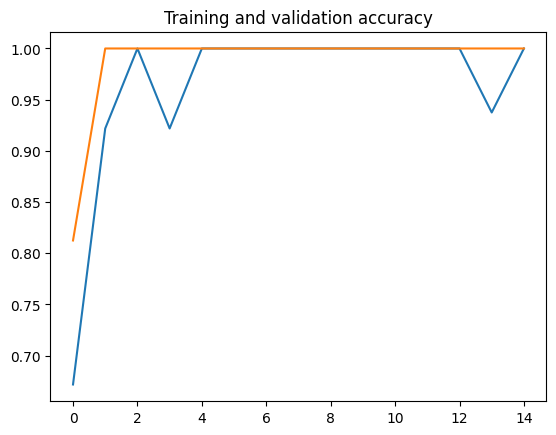

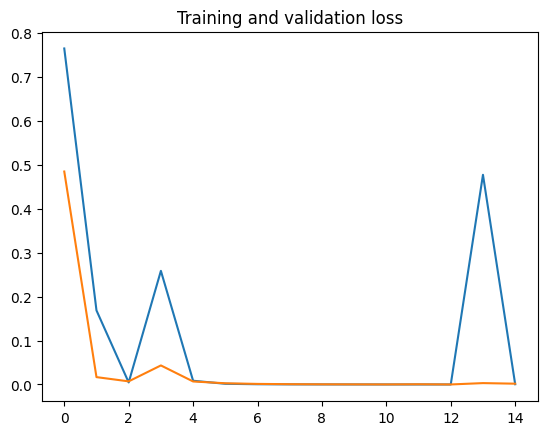

In [ ]:
acc = history.history['acc']
val_acc = history.history['val_acc']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc)
plt.plot(epochs, val_acc)
plt.title('Training and validation accuracy')

plt.figure()

plt.plot(epochs, loss)
plt.plot(epochs, val_loss)
plt.title('Training and validation loss')

In [ ]:
from keras.preprocessing import image
import numpy as np

img_path='/content/drive/MyDrive/Dataset_Mango/train/Mentah/Mango_25_B.JPG'
img = image.load_img(img_path, target_size=(150, 150))
x = image.img_to_array(img)
x = np.expand_dims(x, axis=0)

preds = model.predict(x)
if preds[0][0] > 0.5:
    print("semi-ripe mango")
else:
    print("full-ripe mango")

1/1 [==============================] - 0s 21ms/step
semi-ripe mango
